Лабораторна робота №1
Работа з PyCaret

Виконала: Смірнова Юлія максимівна КНТ-21-3

In [1]:
from pycaret.datasets import get_data

In [2]:
data = get_data('us_presidential_election_results')
data.head()

,cycle,state,dem_poll_avg,dem_poll_avg_margin,incumbent_party,incumbent_running,party_winner
0,1976,California,42.797994,-3.270222,republican,1,republican
1,1976,Colorado,42.180101,-1.373191,republican,1,republican
2,1976,Connecticut,41.698014,-1.469654,republican,1,republican
3,1976,Delaware,33.370748,2.445322,republican,1,democrat
4,1976,Georgia,59.796546,29.379760,republican,1,democrat


,cycle,state,dem_poll_avg,dem_poll_avg_margin,incumbent_party,incumbent_running,party_winner
0,1976,California,42.797994,-3.270222,republican,1,republican
1,1976,Colorado,42.180101,-1.373191,republican,1,republican
2,1976,Connecticut,41.698014,-1.469654,republican,1,republican
3,1976,Delaware,33.370748,2.445322,republican,1,democrat
4,1976,Georgia,59.796546,29.379760,republican,1,democrat


### Опис датасету:
 cycle: рік виборчого циклу (наприклад, 1976).
  state: назва штату (наприклад, California).
  dem_poll_avg: середній результат демократа в опитуваннях (%).
  dem_poll_avg_margin: різниця між демократом і республіканцем в опитуваннях.
  incumbent_party: партія чинного президента (republican/democratic).
  incumbent_running: чи балотується чинний президент (1/0).
  party_winner: партія переможця в штаті.

Датасет містить числові ознаки, такі як dem_poll_avg (середній результат демократа в опитуваннях) та dem_poll_avg_margin (різниця між кандидатами), які можуть бути цінними для прогнозування конкретних виборчих тенденцій. Регресія дозволить вам не просто передбачити переможця (як у класифікації), а оцінити, наскільки сильним буде перевага тієї чи іншої партії в певних штатах. Це дає більш гнучкий аналіз, оскільки ми зможемо:

1. Прогнозувати не лише категорійний результат (democratic/republican), а й конкретні значення підтримки (наприклад, чи буде перевага демократів 5% чи 10%).

2. Аналізувати, як різні фактори (incumbent_party, incumbent_running) впливають на рівень підтримки, а не лише на бінарний результат.

3. Побудувати моделі, які можуть оцінювати сценарії: "Що буде, якщо рейтинг демократа зросте на 3%?"

Регресія особливо корисна, якщо ми хочемо зрозуміти не просто "хто переможе", а "наскільки сильно переможе" та які чинники до цього ведуть.

Ініціалізуємо середовища регресії:

In [3]:
from pycaret.regression import *
exp = setup(data, target='dem_poll_avg', session_id=618)

,Description,Value
0,Session id,618
1,Target,dem_poll_avg
2,Target type,Regression
3,Original data shape,"(497, 7)"
4,Transformed data shape,"(497, 7)"
5,Transformed train set shape,"(347, 7)"
6,Transformed test set shape,"(150, 7)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Тепер нам потрібно провести порівняння моделей

In [5]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.8858,6.4250,2.5024,0.9050,0.0652,0.0486,0.0380
rf,Random Forest Regressor,2.0363,8.0130,2.7727,0.8861,0.0716,0.0526,0.0550
et,Extra Trees Regressor,2.0277,7.8866,2.7658,0.8832,0.0716,0.0522,0.0550
knn,K Neighbors Regressor,2.2129,10.9722,3.2298,0.8526,0.0772,0.0559,0.0230
ada,AdaBoost Regressor,2.8193,12.3693,3.4749,0.8245,0.0864,0.0696,0.0370
br,Bayesian Ridge,2.6951,12.0410,3.4393,0.8228,0.0866,0.0686,0.0220
ridge,Ridge Regression,2.6998,12.1176,3.4503,0.8214,0.0867,0.0687,0.0170
lar,Least Angle Regression,2.7009,12.1281,3.4518,0.8213,0.0868,0.0687,0.0170
lr,Linear Regression,2.7009,12.1281,3.4518,0.8213,0.0868,0.0687,0.4370
lightgbm,Light Gradient Boosting Machine,2.2968,14.5179,3.5902,0.8182,0.0782,0.0551,0.0660


Результати порівняння моделей регресії показують, які алгоритми найкраще прогнозують цільову змінну (у вашому випадку — dem_poll_avg). Ось інтерпретація:

Найкраща модель:

Gradient Boosting Regressor (gbr) має найвищі показники:

R² = 0.9050 (модель пояснює 90.5% дисперсії даних — дуже добре).

MAE = 1.8858 (середня помилка прогнозу — ~1.89%).

RMSE = 2.5024 (помилки більш "важкі" для великих відхилень).

Інші сильні моделі:

Random Forest (rf): R² = 0.8861, але працює повільніше (0.027 сек).

Extra Trees (et): Аналогічний RF, але трохи гірше (R² = 0.8832).

Найгірша модель:

Dummy Regressor (R² = -0.0301) — це базовий алгоритм, який просто прогнозує середнє значення. Його низька якість підтверджує, що інші моделі дійсно корисні.

Детальний аналіз метрик:
R² (Коефіцієнт детермінації):

Найвищий у gbr (0.9050), найнижчий у dummy (-0.0301).

Інтерпретація: Чим ближче до 1, тим краще. Від'ємне значення означає, що модель гірша за прогноз середнім.

MAE (Середня абсолютна помилка):

gbr має найменшу MAE (1.8858), тобто в середньому помиляється на ~1.89%.

Для порівняння: dummy помиляється на 6.6160%.

RMSE (Середньоквадратична помилка):

gbr також лідирує (2.5024), що підтверджує його стабільність.

Час навчання (TT):

Усі моделі навчаються швидко (менше 0.3 сек), тому вибір можна робити на основі якості, а не швидкості.

**Проведемо аналіз за допомогою найкращої моделі gbr**

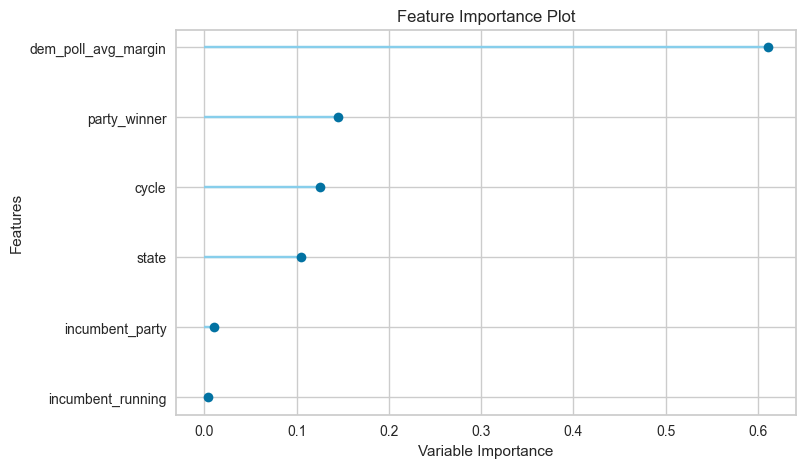

In [8]:
plot_model(best_model, plot='feature')

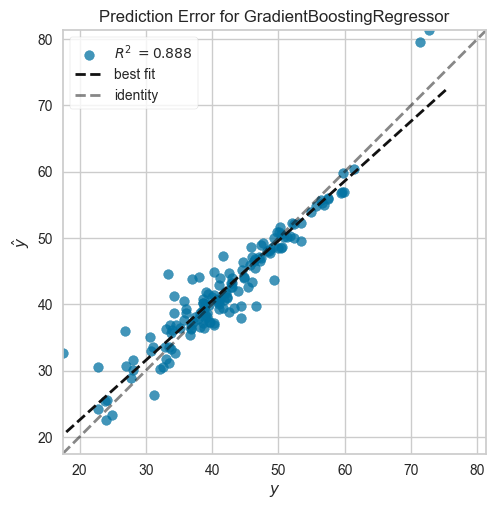

In [9]:
plot_model(best_model, plot='error')

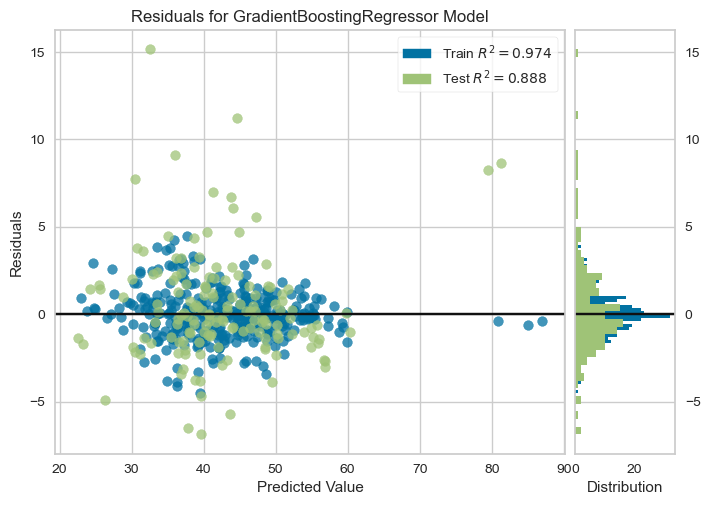

In [8]:
plot_model(best_model, plot='residuals')

Спрогнозуємо новві дані:

In [11]:
model = create_model('gbr')
new_data = data.sample(3).drop('dem_poll_avg', axis=1)  # Пример из исходных данных
predictions = predict_model(model, data=new_data)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2950,8.6628,2.9433,0.8239,0.0772,0.0558
1,1.7729,5.9565,2.4406,0.9285,0.0578,0.0429
2,1.8502,5.7571,2.3994,0.9058,0.0582,0.0453
3,1.9694,6.6005,2.5692,0.9015,0.0750,0.0553
4,1.5310,4.5220,2.1265,0.9221,0.0558,0.0400
5,2.0883,7.2966,2.7012,0.8581,0.0718,0.0569
6,1.4081,3.2780,1.8105,0.9304,0.0447,0.0341
7,2.2698,10.2390,3.1998,0.8855,0.0910,0.0649
8,2.1407,7.7051,2.7758,0.9305,0.0687,0.0535


In [12]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
save_model(model, 'election_poll_predictor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cycle', 'dem_poll_avg_margin',
                                              'incumbent_running'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['state', 'incumbent_party',
                                              'party_winner'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': democrat      0
 republican    1
 NaN          -1
 dtype: int64},
                                                                         {'col': 'party_winner',
                      

Висновок: Gradient Boosting Regressor досяг високої точності (R² = 0.905, MAE = 1.89%) у прогнозуванні рейтингів демократів на основі історичних даних. Модель стабільна (малі стандартні відхилення) і може бути використана для передбачення результатів виборів у різних штатах. Для подальшого вдосконалення рекомендується розширити набір ознак даними соціально-економічних факторів